In [1]:
import ipynb.fs.defs.preprocessing as preprocessing

import numpy as np

from pandas import DataFrame, concat

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D
from keras.layers import Dropout
from keras.layers import LSTM


from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
import xgboost as xgb

from matplotlib import pyplot

import warnings

warnings.filterwarnings('ignore')


/usr/lib/python3/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = preprocessing.DataProcessing()
data.build_datasets()

sliced eth data shape (312, 16)
sliced ae data shape (312, 8)
sliced eth data shape (411, 16)
sliced bat data shape (411, 8)
sliced eth data shape (369, 16)
sliced fun data shape (369, 8)
sliced eth data shape (441, 16)
sliced gno data shape (441, 8)
sliced eth data shape (595, 16)
sliced gnt data shape (595, 8)
sliced eth data shape (119, 16)
sliced loom data shape (119, 8)
sliced eth data shape (367, 16)
sliced omg data shape (367, 8)
sliced eth data shape (346, 16)
sliced rep data shape (346, 8)
sliced eth data shape (292, 16)
sliced salt data shape (292, 8)
sliced eth data shape (384, 16)
sliced snt data shape (384, 8)
sliced eth data shape (336, 16)
sliced zrx data shape (336, 8)
ae NaN Cells: 0
bat NaN Cells: 0
fun NaN Cells: 0
gno NaN Cells: 0
gnt NaN Cells: 0
loom NaN Cells: 0
omg NaN Cells: 0
rep NaN Cells: 0
salt NaN Cells: 0
snt NaN Cells: 0
zrx NaN Cells: 0
ae outperformed ETH on 145 / 312 days
46.47435897435898 % of the time
bat outperformed ETH on 190 / 411 days
46.228710

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.normalized_data['rep']['features'], data.normalized_data['rep']['targets'], test_size=0.33)
print(X_train.shape)

(230, 27)


In [4]:
model = XGBClassifier()
model.fit(X_train, y_train)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [5]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 57.89%


In [6]:
# from sklearn.grid_search import GridSearchCV

xgb_model = xgb.XGBClassifier()
optimization_dict = {'max_depth': [4,5,6],
                     'n_estimators': [400,500,600,700],
                     'booster' : ['gblinear', 'dart']}

model = GridSearchCV(xgb_model, optimization_dict, 
                     scoring='accuracy', verbose=1)


model.fit(X_train, y_train)

print(model.best_score_)
print(model.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
0.5217391304347826
{'n_estimators': 400, 'booster': 'gblinear', 'max_depth': 4}


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   42.7s finished


In [7]:
model.best_estimator_

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [8]:
model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
model_comparrison = DataFrame(columns= ['xgboost', 'lstm', 'svm', 'decison_tree', 'MLP', ''])

In [10]:
def process_model(model, X_train, X_test, y_train, y_test):
    
    eval_set = [(X_test, y_test)]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    X_pred = model.predict(X_train)
    test_accuracy = accuracy_score(y_test, predictions)
    train_accuracy = accuracy_score(y_train, X_pred)
    print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))
    print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
    y_proba = model.predict_proba(X_test) 
    return accuracy, y_pred, y_proba 

In [11]:
process_model(xgb_model, X_train, X_test, y_train, y_test)

Test Accuracy: 57.89%
Train Accuracy: 99.57%


(0.5789473684210527,
 array([0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
        1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.]),
 array([[0.7635651 , 0.23643489],
        [0.4400336 , 0.5599664 ],
        [0.45074552, 0.5492545 ],
        [0.5805489 , 0.41945112],
        [0.29453957, 0.7054604 ],
        [0.5515039 , 0.44849607],
        [0.25780112, 0.7421989 ],
        [0.85315096, 0.14684907],
        [0.46551406, 0.53448594],
        [0.46545523, 0.53454477],
        [0.73322284, 0.26677716],
        [0.43939793, 0.56060207],
        [0.5257484 , 0.47425166],
        [0.33011234, 0.

[0]	validation_0-error:0.478261	validation_0-logloss:0.69285	validation_1-error:0.394737	validation_1-logloss:0.691613
[1]	validation_0-error:0.478261	validation_0-logloss:0.692642	validation_1-error:0.394737	validation_1-logloss:0.690421
[2]	validation_0-error:0.478261	validation_0-logloss:0.692494	validation_1-error:0.394737	validation_1-logloss:0.689488
[3]	validation_0-error:0.478261	validation_0-logloss:0.692384	validation_1-error:0.394737	validation_1-logloss:0.688752
[4]	validation_0-error:0.478261	validation_0-logloss:0.692302	validation_1-error:0.394737	validation_1-logloss:0.688168
[5]	validation_0-error:0.478261	validation_0-logloss:0.692239	validation_1-error:0.394737	validation_1-logloss:0.6877
[6]	validation_0-error:0.478261	validation_0-logloss:0.692189	validation_1-error:0.394737	validation_1-logloss:0.687322
[7]	validation_0-error:0.478261	validation_0-logloss:0.692149	validation_1-error:0.394737	validation_1-logloss:0.687016
[8]	validation_0-error:0.478261	validation_

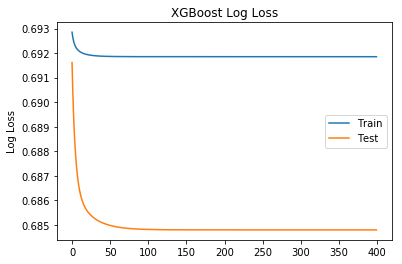

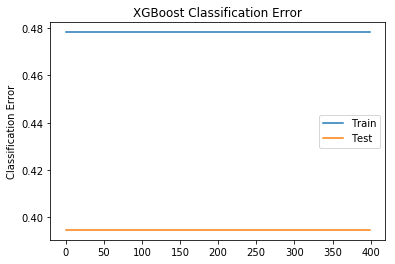

In [12]:
eval_set = [(X_train, y_train), (X_test, y_test)]

# model= XGBClassifier()
model.best_estimator_.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
    
y_pred = model.best_estimator_.predict(X_test)
predictions = [round(value) for value in y_pred]
X_pred = model.best_estimator_.predict(X_train)
test_accuracy = accuracy_score(y_test, predictions)
train_accuracy = accuracy_score(y_train, X_pred)
print("Test Accuracy: %.2f%%" % (test_accuracy * 100.0))
print("Train Accuracy: %.2f%%" % (train_accuracy * 100.0))
y_proba = model.best_estimator_.predict_proba(X_test) 
results = model.best_estimator_.evals_result()
# print(results)
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

Train on 250 samples, validate on 342 samples
Epoch 1/400
250/250 [==============================] - 4s 15ms/step - loss: 0.6968 - acc: 0.4720 - val_loss: 0.6791 - val_acc: 0.5789
Epoch 2/400
250/250 [==============================] - 0s 628us/step - loss: 0.6891 - acc: 0.5520 - val_loss: 0.6790 - val_acc: 0.5789
Epoch 3/400
250/250 [==============================] - 0s 652us/step - loss: 0.6876 - acc: 0.5480 - val_loss: 0.6793 - val_acc: 0.5789
Epoch 4/400
250/250 [==============================] - 0s 609us/step - loss: 0.6867 - acc: 0.5480 - val_loss: 0.6807 - val_acc: 0.5789
Epoch 5/400
250/250 [==============================] - 0s 636us/step - loss: 0.6866 - acc: 0.5480 - val_loss: 0.6798 - val_acc: 0.5789
Epoch 6/400
250/250 [==============================] - 0s 628us/step - loss: 0.6857 - acc: 0.5480 - val_loss: 0.6818 - val_acc: 0.5789
Epoch 7/400
250/250 [==============================] - 0s 632us/step - loss: 0.6853 - acc: 0.5480 - val_loss: 0.6806 - val_acc: 0.5789
Epoch 8/40

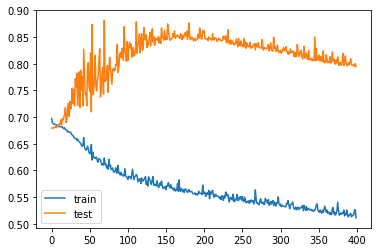

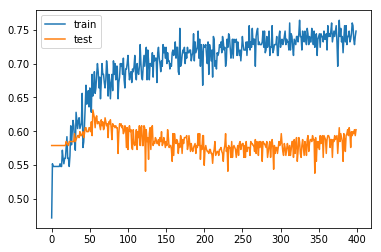

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D
from keras.layers import Dropout
from keras.layers import LSTM

X_train, X_test, y_train, y_test = data.train_test_sets['gnt']['train_X'], data.train_test_sets['gnt']['test_X'], data.train_test_sets['gnt']['train_y'], data.train_test_sets['gnt']['test_y']
                                            
    
model = Sequential()

model.add(LSTM(32,input_shape=(X_train.shape[1], X_train.shape[2]),recurrent_dropout=0.6 ,unit_forget_bias=True))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# fit network
history = model.fit(X_train, y_train, epochs=400, batch_size=10, validation_data=(X_test, y_test), verbose=1, shuffle=True)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [14]:
from keras.models import load_model

model.save('lstm_v1_rep.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')


In [15]:
model

omg


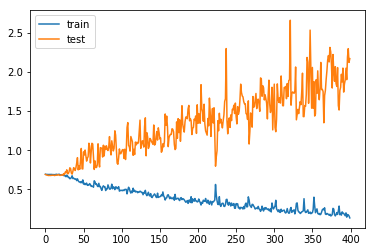

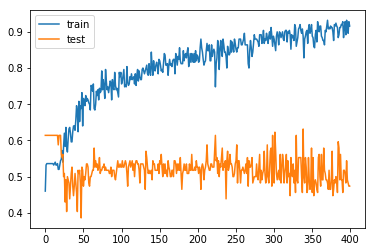

['loss', 'acc']
114/114 [==============================] - 0s 82us/step
[2.1684214023121617, 0.47368421052631576]
rep


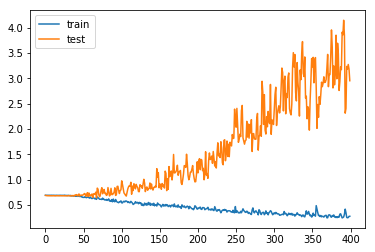

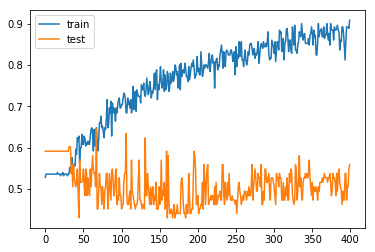

['loss', 'acc']
93/93 [==============================] - 0s 83us/step
[2.952542540847614, 0.5591397785371349]
salt


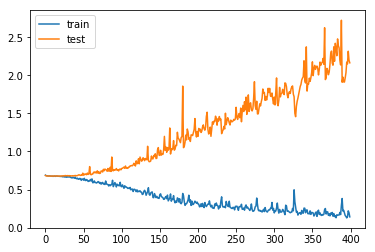

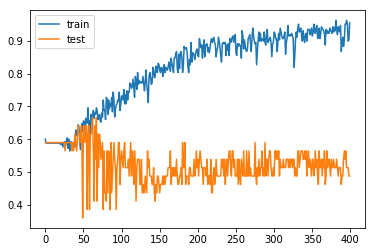

['loss', 'acc']
39/39 [==============================] - 0s 147us/step
[2.164674300413865, 0.4871794879436493]
snt


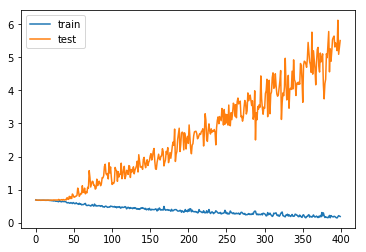

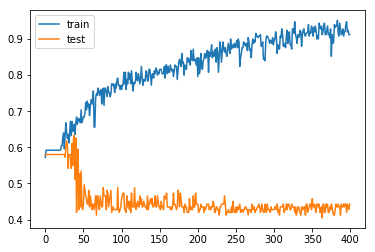

['loss', 'acc']
131/131 [==============================] - 0s 90us/step
[5.508531464875199, 0.4427480920580507]
zrx


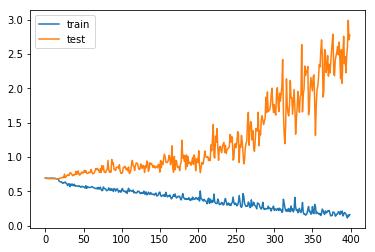

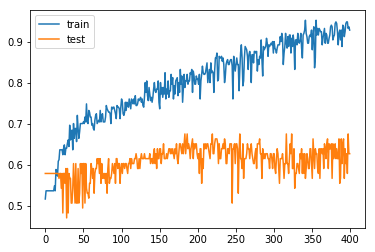

['loss', 'acc']
83/83 [==============================] - 0s 76us/step
[2.772750336003591, 0.6265060269688986]


In [16]:
#train all models, use data.erc20_names 
for erc20 in  ['omg', 'rep', 'salt', 'snt', 'zrx']:
    X_train, X_test, y_train, y_test = data.train_test_sets[erc20]['train_X'], data.train_test_sets[erc20]['test_X'], data.train_test_sets[erc20]['train_y'], data.train_test_sets[erc20]['test_y']
                                            

    model = Sequential()
    model.add(LSTM(32,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
    # model.add(Flatten())
    model.add(LSTM(32, return_sequences=True))
    model.add(Dropout(0.7))
    model.add(LSTM(32))
    model.add(Dropout(0.7))
    model.add(Dense(32))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



    # fit network
    history = model.fit(X_train, y_train, epochs=400, batch_size=10, validation_data=(X_test, y_test), verbose=0, shuffle=True)
    
    # plot history
    print(erc20)
    
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()

    pyplot.plot(history.history['acc'], label='train')
    pyplot.plot(history.history['val_acc'], label='test')
    pyplot.legend()
    pyplot.show()
    print(model.metrics_names)
    print(model.evaluate(x=X_test, y=y_test, verbose=1))
    model.save('lstm_v1_' + erc20 + '.h5')  # creates a HDF5 file '.'
    del model  # deletes the existing model


In [17]:
from keras.models import load_model
ae = load_model('lstm_v1_ae.h5')
bat = load_model('lstm_v1_bat.h5')
fun = load_model('lstm_v1_fun.h5')
gno = load_model('lstm_v1_gno.h5')
gnt = load_model('lstm_v1_gnt.h5')
omg = load_model('lstm_v1_omg.h5')
rep = load_model('lstm_v1_rep.h5')

In [18]:
X_train.shape[2]

54

In [19]:
X_train, X_test, y_train, y_test = data.train_test_sets['rep']['train_X'], data.train_test_sets['rep']['test_X'], data.train_test_sets['rep']['train_y'], data.train_test_sets['rep']['test_y']
print(X_train.shape[1], X_train.shape[2])

1 54


In [ ]:
X_train, X_test, y_train, y_test = data.train_test_sets['rep']['train_X'], data.train_test_sets['rep']['test_X'], data.train_test_sets['rep']['train_y'], data.train_test_sets['rep']['test_y']
# print(X_train.shape[1])
# print(X_train.shape[2])
    
# model = Sequential()

# model.add(LSTM(32,input_shape=(X_train.shape[1], X_train.shape[2]),recurrent_dropout=0.6 ,unit_forget_bias=True))


# # model.add(LSTM(64,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
# # model.add(Flatten())
# # model.add(LSTM(64, return_sequences=True))
# # # model.add(Dropout(0.7))
# # model.add(LSTM(64))
# # # model.add(Dropout(0.7))
# # model.add(Dense(32))
# model.add(Dense(1, activation = 'sigmoid'))

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# # fit network
# history = model.fit(X_train, y_train, epochs=500, batch_size=10, validation_data=(X_test, y_test), verbose=1, shuffle=True)
# # plot history
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

# pyplot.plot(history.history['acc'], label='train')
# pyplot.plot(history.history['val_acc'], label='test')
# pyplot.legend()
# pyplot.show()

from keras.wrappers.scikit_learn import KerasClassifier
def create_model():

    model = Sequential()
    model.add(LSTM(32,input_shape=(1, 54),recurrent_dropout=0.6 ,unit_forget_bias=True))

    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load dataset
# split into input (X) and output (Y) variables
X = X_train
Y = y_train
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20,50,100]
epochs = [10, 50,100,300,500]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
print('h')

In [ ]:
data.train_test_sets['gnt']['test_y'].count(1)

In [ ]:
data.train_test_sets['gnt']['test_y'].count(0)